#### Load data & filter for Conventional Loan - NY only

In [1]:
import numpy as np
import pandas as pd
import zipfile

In [2]:
zf = zipfile.ZipFile("hmda_lar.zip", "r")
data = pd.read_csv(zf.open("hmda_lar.csv"))

/Users/Lydia/anaconda/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (15,16,17,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_conv = data[data["loan_type"] == 1]

In [4]:
NY_data = data_conv[data_conv["state_abbr"] == "NY"]

In [5]:
NY_data.shape

(337707, 78)

In [6]:
NY_data.to_csv("NY_data.csv", sep=',')

Since "_name" columns service as explaination for colmns with number in column names, remove them from dataframe.

In [7]:
clean_col = [name for name in NY_data.columns if "_name" not in name]

In [8]:
type(clean_col)
print(clean_col)

['action_taken', 'agency_code', 'agency_abbr', 'applicant_ethnicity', 'applicant_income_000s', 'applicant_race_1', 'applicant_race_2', 'applicant_race_3', 'applicant_race_4', 'applicant_race_5', 'applicant_sex', 'application_date_indicator', 'as_of_year', 'census_tract_number', 'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_race_2', 'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5', 'co_applicant_sex', 'county_code', 'denial_reason_1', 'denial_reason_2', 'denial_reason_3', 'edit_status', 'hoepa_status', 'lien_status', 'loan_purpose', 'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 'property_type', 'purchaser_type', 'respondent_id', 'sequence_number', 'state_code', 'state_abbr', 'hud_median_family_income', 'loan_amount_000s', 'number_of_1_to_4_family_units', 'number_of_owner_occupied_units', 'minority_population', 'population', 'rate_spread', 'tract_to_msamd_income']


In [9]:
clean_col.remove("agency_code")

In [10]:
clean_col.remove("state_code")

In [11]:
NY_data = NY_data[clean_col]

In [12]:
NY_data.head()

,action_taken,agency_abbr,applicant_ethnicity,applicant_income_000s,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,applicant_sex,...,sequence_number,state_abbr,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
6,1,CFPB,2,200.0,5,NaN,NaN,NaN,NaN,1,...,26589,NY,71300.0,460,53.0,256.0,45.959999,3512.0,NaN,160.600006
34,1,CFPB,2,255.0,5,NaN,NaN,NaN,NaN,1,...,106528,NY,109000.0,648,835.0,676.0,30.059999,2339.0,NaN,133.300003
66,1,CFPB,2,25.0,2,5.0,NaN,NaN,NaN,1,...,8633,NY,69000.0,57,1891.0,804.0,45.419998,4881.0,NaN,48.299999
84,1,CFPB,3,114.0,6,NaN,NaN,NaN,NaN,3,...,106529,NY,109000.0,302,363.0,1817.0,21.139999,5870.0,NaN,109.459999
97,5,HUD,2,32.0,3,NaN,NaN,NaN,NaN,2,...,141368,NY,109000.0,172,693.0,480.0,83.349998,2571.0,NaN,78.470001


Since this analysis is for NY and Conventinal loan only, remove state and loan type.

In [13]:
NY_data = NY_data.drop("state_abbr",1)

In [14]:
NY_data = NY_data.drop("loan_type",1)

In [15]:
NY_data.head()

,action_taken,agency_abbr,applicant_ethnicity,applicant_income_000s,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,applicant_sex,...,respondent_id,sequence_number,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
6,1,CFPB,2,200.0,5,NaN,NaN,NaN,NaN,1,...,0002735146,26589,71300.0,460,53.0,256.0,45.959999,3512.0,NaN,160.600006
34,1,CFPB,2,255.0,5,NaN,NaN,NaN,NaN,1,...,0000476810,106528,109000.0,648,835.0,676.0,30.059999,2339.0,NaN,133.300003
66,1,CFPB,2,25.0,2,5.0,NaN,NaN,NaN,1,...,0000501105,8633,69000.0,57,1891.0,804.0,45.419998,4881.0,NaN,48.299999
84,1,CFPB,3,114.0,6,NaN,NaN,NaN,NaN,3,...,0000476810,106529,109000.0,302,363.0,1817.0,21.139999,5870.0,NaN,109.459999
97,5,HUD,2,32.0,3,NaN,NaN,NaN,NaN,2,...,75-2921540,141368,109000.0,172,693.0,480.0,83.349998,2571.0,NaN,78.470001


#### Select variables to run into model

In [16]:
miss_per = ["applicant_race_1", "applicant_race_2", "applicant_race_3", "applicant_race_4", "applicant_race_5", "co_applicant_race_1", "co_applicant_race_2", "co_applicant_race_3", "co_applicant_race_4", "co_applicant_race_5", \
            "rate_spread", "edit_status"]

In [17]:
for i in miss_per:
    print ("Percentage of missing value: ", i)
    print (sum(NY_data[i].isnull())/NY_data.shape[0])

Percentage of missing value:  applicant_race_1
0.0
Percentage of missing value:  applicant_race_2
0.996298566509
Percentage of missing value:  applicant_race_3
0.999792719724
Percentage of missing value:  applicant_race_4
0.999958543945
Percentage of missing value:  applicant_race_5
0.999973349679
Percentage of missing value:  co_applicant_race_1
0.0
Percentage of missing value:  co_applicant_race_2
0.99883626931
Percentage of missing value:  co_applicant_race_3
0.999923010183
Percentage of missing value:  co_applicant_race_4
0.999988155413
Percentage of missing value:  co_applicant_race_5
0.999994077706
Percentage of missing value:  rate_spread
0.98858774026
Percentage of missing value:  edit_status
0.821007559808


Since missing percetage is over 99% for 2 and onward, will drop those columns and only keep first column of race as race information.

Define a application is approved when action code is 1,2,6,8. The goal of this practice is to predict whether a application will be approved or not, denial reason therefore is not relenvent. 

In [18]:
NY_data = NY_data.drop("applicant_race_2",1)
NY_data = NY_data.drop("applicant_race_3",1)
NY_data = NY_data.drop("applicant_race_4",1)
NY_data = NY_data.drop("applicant_race_5",1)
NY_data = NY_data.drop("co_applicant_race_2",1)
NY_data = NY_data.drop("co_applicant_race_3",1)
NY_data = NY_data.drop("co_applicant_race_4",1)
NY_data = NY_data.drop("co_applicant_race_5",1)
NY_data = NY_data.drop("denial_reason_1",1)
NY_data = NY_data.drop("denial_reason_2",1)
NY_data = NY_data.drop("denial_reason_3",1)
NY_data = NY_data.drop("purchaser_type", 1)

In [19]:
NY_data.head()

,action_taken,agency_abbr,applicant_ethnicity,applicant_income_000s,applicant_race_1,applicant_sex,application_date_indicator,as_of_year,census_tract_number,co_applicant_ethnicity,...,respondent_id,sequence_number,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
6,1,CFPB,2,200.0,5,1,0,2015,111.00,5,...,0002735146,26589,71300.0,460,53.0,256.0,45.959999,3512.0,NaN,160.600006
34,1,CFPB,2,255.0,5,1,0,2015,3026.00,5,...,0000476810,106528,109000.0,648,835.0,676.0,30.059999,2339.0,NaN,133.300003
66,1,CFPB,2,25.0,2,1,0,2015,58.02,5,...,0000501105,8633,69000.0,57,1891.0,804.0,45.419998,4881.0,NaN,48.299999
84,1,CFPB,3,114.0,6,3,0,2015,3007.00,5,...,0000476810,106529,109000.0,302,363.0,1817.0,21.139999,5870.0,NaN,109.459999
97,5,HUD,2,32.0,3,2,0,2015,4072.04,5,...,75-2921540,141368,109000.0,172,693.0,480.0,83.349998,2571.0,NaN,78.470001


#### Convert variable to the right data type

In [20]:
NY_data.columns

Index(['action_taken', 'agency_abbr', 'applicant_ethnicity',
       'applicant_income_000s', 'applicant_race_1', 'applicant_sex',
       'application_date_indicator', 'as_of_year', 'census_tract_number',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex',
       'county_code', 'edit_status', 'hoepa_status', 'lien_status',
       'loan_purpose', 'msamd', 'owner_occupancy', 'preapproval',
       'property_type', 'respondent_id', 'sequence_number',
       'hud_median_family_income', 'loan_amount_000s',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'minority_population', 'population', 'rate_spread',
       'tract_to_msamd_income'],
      dtype='object')

MSAMD: The FFIEC Geocoding System allows you to retrieve Metropolitan Statistical Area (MSA), State, County, and Census Tract codes for street addresses. Beginning with 2004, Metropolitan Area was changed to a 5-digit Metropolitan Statistical Area/Metropolitan Division (MSA/MD) number.

HOEPA: The Home Ownership and Equity Protection Act (HOEPA) 

References:
- https://www.ffiec.gov/hmdarawdata/FORMATS/2011HMDACodeSheet.pdf
- https://www.ffiec.gov/hmda/pdf/regulationc2004.pdf#AppendixA,I.B.1.d

In [21]:
cat_data = NY_data

In [22]:
cat = ["action_taken", "agency_abbr", "applicant_ethnicity", "applicant_race_1",\
      "applicant_sex", "census_tract_number",  "co_applicant_ethnicity", "co_applicant_race_1", \
       "co_applicant_sex","edit_status", "hoepa_status", "lien_status","loan_purpose", "msamd",\
      "owner_occupancy", "preapproval", "property_type", "county_code", "respondent_id","sequence_number",\
      "rate_spread", "as_of_year", "application_date_indicator"]


cat_data[cat] = NY_data[cat].astype(str)

In [23]:
cat_data.dtypes

action_taken                       object
agency_abbr                        object
applicant_ethnicity                object
applicant_income_000s             float64
applicant_race_1                   object
applicant_sex                      object
application_date_indicator         object
as_of_year                         object
census_tract_number                object
co_applicant_ethnicity             object
co_applicant_race_1                object
co_applicant_sex                   object
county_code                        object
edit_status                        object
hoepa_status                       object
lien_status                        object
loan_purpose                       object
msamd                              object
owner_occupancy                    object
preapproval                        object
property_type                      object
respondent_id                      object
sequence_number                    object
hud_median_family_income          

#### Perform Explotory Data Analysis

In [24]:
cat_data.describe()

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income
count,304864.000000,336332.000000,337707.000000,335774.000000,335986.000000,336307.000000,336307.000000,336241.000000
mean,154.299278,78156.585457,361.774497,1473.072704,1210.643009,28.602026,4788.137782,122.361974
std,295.927737,16030.323803,1326.087956,823.560638,619.928316,27.764787,1932.720770,57.482680
min,1.000000,57200.000000,1.000000,6.000000,2.000000,0.340000,1.000000,3.670000
25%,61.000000,69700.000000,100.000000,890.000000,733.000000,8.140000,3452.000000,89.510002
50%,96.000000,71300.000000,212.000000,1476.000000,1195.000000,17.660000,4578.000000,109.220001
75%,155.000000,82700.000000,380.000000,2000.000000,1640.000000,38.110001,5938.000000,137.309998
max,9999.000000,109000.000000,99999.000000,6345.000000,6454.000000,100.000000,26588.000000,367.609985


Will need to confirm with client regards "9999" in applicat income and "99999" in loan amount. Here treat them as outlier and remove those record.

As for missing values, can remove or replace:
- With mean;
- With previous record's value;
- With next record's value;
- With 0;
- With predictions using available records. 

In this practice, due to time constrain, will leave them in the data and apply classification model that can handle missing values.

In [25]:
sum(cat_data["applicant_income_000s"]==9999)

53

In [26]:
sum(cat_data["loan_amount_000s"]== 99999)

18

In [27]:
cat_data = cat_data[cat_data["applicant_income_000s"] != 9999]

In [28]:
cat_data = cat_data[cat_data["loan_amount_000s"] != 99999]

In [29]:
cat_data.shape

(337636, 31)

In [41]:
plot_col = ["applicant_income_000s", "loan_amount_000s"]

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

(0, 900)

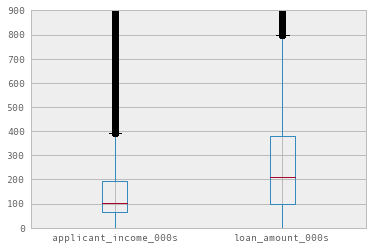

In [78]:
ax=cat_data[plot_col].boxplot()
ax.set_ylim(0, (900))


As shown in above plot, no outlier after removing 9999 and 99999.

#### Creat target label

In [44]:
cat_data["targets"] = cat_data["action_taken"].apply(lambda x: +1 if x in ("1", "2", "6", "8") else -1)

In [45]:
cat_data = cat_data.drop("action_taken",1)

In [46]:
cat_data.head()

,agency_abbr,applicant_ethnicity,applicant_income_000s,applicant_race_1,applicant_sex,application_date_indicator,as_of_year,census_tract_number,co_applicant_ethnicity,co_applicant_race_1,...,sequence_number,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income,targets
6,CFPB,2,200.0,5,1,0,2015,111.0,5,8,...,26589,71300.0,460,53.0,256.0,45.959999,3512.0,nan,160.600006,1
34,CFPB,2,255.0,5,1,0,2015,3026.0,5,8,...,106528,109000.0,648,835.0,676.0,30.059999,2339.0,nan,133.300003,1
66,CFPB,2,25.0,2,1,0,2015,58.02,5,8,...,8633,69000.0,57,1891.0,804.0,45.419998,4881.0,nan,48.299999,1
84,CFPB,3,114.0,6,3,0,2015,3007.0,5,8,...,106529,109000.0,302,363.0,1817.0,21.139999,5870.0,nan,109.459999,1
97,HUD,2,32.0,3,2,0,2015,4072.04,5,8,...,141368,109000.0,172,693.0,480.0,83.349998,2571.0,nan,78.470001,-1


#### Build Decision Tree Model

In [47]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [48]:
cat_data = cat_data.apply(preprocessing.LabelEncoder().fit_transform)

In [49]:
train_data, test_data = train_test_split(cat_data, train_size=0.8, random_state=0)

/Users/Lydia/anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [50]:
decision_tree_model = tree.DecisionTreeClassifier(max_depth=6)

In [51]:
#small_model = tree.DecisionTreeClassifier(max_depth=2)

In [52]:
train_input = train_data.drop("targets",1)

In [53]:
decision_tree_model.fit(train_input, train_data["targets"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
from sklearn import tree
tree.export_graphviz(decision_tree_model,out_file='tree.dot') 

#### Make prediction

In [55]:
test_approval = test_data[test_data["targets"] == 1]
test_nonapproval = test_data[test_data["targets"] == 0]

In [56]:
sample_test_approval = test_approval[0:2]
sample_test_nonapproval = test_nonapproval[0:2]

In [57]:
sample_test_approval

,agency_abbr,applicant_ethnicity,applicant_income_000s,applicant_race_1,applicant_sex,application_date_indicator,as_of_year,census_tract_number,co_applicant_ethnicity,co_applicant_race_1,...,sequence_number,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income,targets
10337949,4,1,104,4,1,0,0,492,1,4,...,17093,13,68,1915,1762,1290,2976,576,2346,1
1828647,0,1,224,1,1,0,0,135,1,1,...,103376,14,943,934,925,1891,1413,576,1730,1


In [58]:
sample_test_nonapproval

,agency_abbr,applicant_ethnicity,applicant_income_000s,applicant_race_1,applicant_sex,application_date_indicator,as_of_year,census_tract_number,co_applicant_ethnicity,co_applicant_race_1,...,sequence_number,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income,targets
10962982,0,1,51,1,1,0,0,1133,4,7,...,111956,9,269,1556,505,3279,3256,576,390,0
3630913,3,1,116,2,1,0,0,2427,4,7,...,43500,9,491,911,182,3269,1414,576,960,0


In [59]:
sample_test = sample_test_approval.append(sample_test_nonapproval)

In [60]:
sample_test

,agency_abbr,applicant_ethnicity,applicant_income_000s,applicant_race_1,applicant_sex,application_date_indicator,as_of_year,census_tract_number,co_applicant_ethnicity,co_applicant_race_1,...,sequence_number,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income,targets
10337949,4,1,104,4,1,0,0,492,1,4,...,17093,13,68,1915,1762,1290,2976,576,2346,1
1828647,0,1,224,1,1,0,0,135,1,1,...,103376,14,943,934,925,1891,1413,576,1730,1
10962982,0,1,51,1,1,0,0,1133,4,7,...,111956,9,269,1556,505,3279,3256,576,390,0
3630913,3,1,116,2,1,0,0,2427,4,7,...,43500,9,491,911,182,3269,1414,576,960,0


In [61]:
decision_tree_model.predict(test_data.drop("targets",1))

array([1, 0, 1, ..., 1, 1, 0])

#### Evaluat accuracy of the decision tree model

In [62]:
decision_tree_model.score(train_data.drop('targets',1), train_data["targets"], sample_weight=None)

0.71856812830423389

In [63]:
decision_tree_model.score(test_data.drop('targets',1), test_data["targets"], sample_weight=None)

0.71633988863878684

#### Quantify the cost of mistakes

In [64]:
test_prediction = decision_tree_model.predict(test_data.drop("targets",1))

In [65]:
false_pos = sum(test_prediction>test_data["targets"])
print("Number of False positives is:", false_pos)

Number of False positives is: 11896


In [66]:
false_neg = sum(test_prediction<test_data["targets"])
print ("Number of False Negative is:", false_neg)

Number of False Negative is: 7259


total_cost = false_neg \* false_neg_cost + false_pos \* false_pos_cost